## Exploratory Data Analysis
Now let us do some exploratory data analysis with a couple of questions.

### How much it cost to publish a paper in a 2010?
1, Import merged files generated previously contain both publication and grant information on selected columns.

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

merge_file = pd.read_csv("FY2010_merge_all.csv", encoding = "ISO-8859-1") 
merge_file = merge_file.drop("Unnamed: 0", axis=1)
merge_file.head()

,ADMINISTERING_IC,APPLICATION_TYPE,BUDGET_START,BUDGET_END,CORE_PROJECT_NUM,FY,SUPPORT_YEAR,TOTAL_COST,PMID,PubDate,PubTypeList,FullJournalName,GRID
0,DK,1,5/1/10,4/30/11,F32DK085835,2010,1,52106.0,22335236,2012 Mar 2,['Journal Article'],Journal of proteome research,F32DK085835
1,DK,1,5/1/10,4/30/11,F32DK085835,2010,1,52106.0,21838295,2011 Oct 7,['Journal Article'],Journal of proteome research,F32DK085835
2,DK,1,6/15/10,6/14/11,F32DK085905,2010,1,50474.0,21690215,2011 Jul 1,"['Journal Article', 'Review']",Cold Spring Harbor perspectives in biology,F32DK085905
3,DK,1,3/2/10,3/1/11,F32DK085935,2010,1,47606.0,23334396,2013 Feb,['Journal Article'],Journal of the American Society of Nephrology ...,F32DK085935
4,DK,1,3/2/10,3/1/11,F32DK085935,2010,1,47606.0,22682975,2013 Aug,['Journal Article'],"Nutrition, metabolism, and cardiovascular dise...",F32DK085935


2, Caculate the average cost to publish a paper.

a) To reduce noise, let us remove grants does not have any publications, only consider the grants have publication records.
The number of lines before and after remove na are printed.

In [4]:
### clean data and remove empty values.
merge_file_dropna = merge_file.dropna()
### comapre the number of publications before and after remove na value
total_publications_before = len(merge_file)
total_publications_after = len(merge_file_dropna)
print("Before remove na, there are", total_publications_before , "pblications.")
print("Before remove na, there are", total_publications_after , "pblications.")

Before remove na, there are 31138 pblications.
Before remove na, there are 20451 pblications.


b) Let us caculated how many grants are linked to the total of 20451 papers in the merged files after remove no publised grants.

In [5]:
merge_file_dropna_total_grant = merge_file_dropna[['GRID', 'TOTAL_COST']].groupby(['GRID']).size()
total_grant = len(merge_file_dropna_total_grant)

c) Caculate the total cost of these 4110 grants.

In [6]:
merge_file_dropna_total_cost = merge_file_dropna[['GRID', 'TOTAL_COST']].groupby(['GRID']).mean().sort_values(by='TOTAL_COST', ascending=True)
total_cost = sum(merge_file_dropna_total_cost["TOTAL_COST"])

d) The average cost of publications is caculated as follows:

In [7]:
average_cost = total_cost/total_publications_after

In [8]:
print("The total number of new grant in 2010 is", total_grant)
print("The total cost of new grant in 2010 is", total_cost, "US dollars." )
print("The total number of publications of new grant in 2010 is", total_publications_after )
print("The average cost of publications of new grant in 2010 is", average_cost,"US dollars.")

The total number of new grant in 2010 is 4110
The total cost of new grant in 2010 is 1845871548.0 US dollars.
The total number of publications of new grant in 2010 is 20451
The average cost of publications of new grant in 2010 is 90258.2537773 US dollars.


e) Next, let us focus only on R01 grants, to see whether the average cost is silimar to the total average cost.

In [9]:
GRID = merge_file_dropna["GRID"]
R01 = [x for x in list(GRID) if x.startswith("R01")]

In [10]:
R01_df = merge_file_dropna[merge_file_dropna["GRID"].isin(R01)]
all_publications = len(merge_file_dropna)
R01_publications = len(R01_df)

print("The number of publications is", all_publications)
print("The number of R01 related publications is", R01_publications)

The number of publications is 20451
The number of R01 related publications is 9297


In [11]:
R01_total_cost = R01_df[['GRID', 'TOTAL_COST']].groupby(['GRID']).mean().sort_values(by='TOTAL_COST', ascending=True)
R01_total_cost.tail()

,TOTAL_COST
GRID,
R01HL098433,2140244.0
R01CA142081,2191541.0
R01CA151933,2285062.0
R01CA139020,3278944.0
R01DA030976,3311492.0


In [12]:
R01_total_grant = R01_df[['GRID', 'TOTAL_COST']].groupby(['GRID']).size()
R01_total_grant_number = len(R01_total_grant)
R01_tota_cost = sum(R01_total_cost["TOTAL_COST"])
R01_ave_cost = R01_tota_cost/R01_publications

print("The total number of R01 new grant in 2010 is", R01_total_grant_number)
print("The total cost of R01 new grant in 2010 is", R01_tota_cost,"US dollars.")
print("The total number of R01 publications of new grant in 2010 is", R01_publications)
print("The average cost of R01 publications of new grant in 2010 is", R01_ave_cost,"US dollars.")

The total number of R01 new grant in 2010 is 2038
The total cost of R01 new grant in 2010 is 860973788.0 US dollars.
The total number of R01 publications of new grant in 2010 is 9297
The average cost of R01 publications of new grant in 2010 is 92607.7001183 US dollars.


### How long it takes to publish a paper?

1, Generate new features including "GR_Star_year", "GR_End_year", "GR_Total_year", "Pub_year" and "time_to_pub".

In [ ]:
import numpy 
import pandas as pd

with open(file,"r") as f:
    header= f.readline()
    h1=header.strip().split(",")
    h1.append("GR_Star_year")
    h1.append("GR_End_year")
    h1.append("GR_Total_year")
    h1.append("Pub_year")
    h1.append("time_to_pub")
    new_header=",".join(h1)
    output.write(new_header+"\n")
    
    rest=f.readlines()
    for line in rest:
        newline=line.strip().split(",")
        Str_year=newline[3].strip().split("/")[-1]
        Str_year="20"+Str_year
        End_year=newline[4].strip().split("/")[-1]
        End_year="20"+End_year
        Total_year=int(End_year)-int(Str_year)
        Pub_year=newline[10].strip().split(" ")[0]
        time_to_pub=int(Pub_year)-int(2010)
        
        newline.append(str(Str_year))
        newline.append(str(End_year))
        newline.append(str(Total_year))
        newline.append(str(Pub_year))
        newline.append(str(time_to_pub))
        newline2=",".join(newline) 
        output.write(newline2+"\n")
        print(newline)

f.close()
output.close()

In [14]:
df_add_time = pd.read_csv("FY2010_merge_add_features.csv", encoding = "ISO-8859-1") 
df_add_time_drop = df_add_time.drop("Unnamed: 0", axis=1)
df_add_time_drop.head()

,ADMINISTERING_IC,APPLICATION_TYPE,BUDGET_START,BUDGET_END,CORE_PROJECT_NUM,FY,SUPPORT_YEAR,TOTAL_COST,PMID,PubDate,PubTypeList,FullJournalName,GRID,GR_Star_year,GR_End_year,GR_Total_year,Pub_year,time_to_pub
0,RR,1,1/14/10,1/13/15,C06RR029852,2010,1,14682885.0,21540427,2011 May 4,"['Comment', 'Editorial']",JAMA,C06RR029852,2010,2015,5,2011,1
1,RR,1,3/25/10,3/24/14,C06RR029965,2010,1,14895273.0,26777474,2016 Mar 15,['Journal Article'],Journal of neuroscience methods,C06RR029965,2010,2014,4,2016,6
2,RR,1,3/25/10,3/24/14,C06RR029965,2010,1,14895273.0,26595808,2016 Jan,['Journal Article'],JAMA neurology,C06RR029965,2010,2014,4,2016,6
3,RR,1,3/25/10,3/24/14,C06RR029965,2010,1,14895273.0,26469053,2015 Oct 15,['Journal Article'],Nature,C06RR029965,2010,2014,4,2015,5
4,RR,1,3/25/10,3/24/14,C06RR029965,2010,1,14895273.0,26255945,2016 Feb,['Journal Article'],"Cerebellum (London, England)",C06RR029965,2010,2014,4,2016,6


Caculate the average time to publish a paper in 2010.

In [15]:
df_add_time_drop_bytime = df_add_time_drop[["CORE_PROJECT_NUM","time_to_pub"]].groupby(["CORE_PROJECT_NUM"]).mean().sort_values(by="time_to_pub",ascending=False)
average_time = df_add_time_drop_bytime["time_to_pub"].mean()
print("The average time of publish in 2010 is ", average_time, "years")

The average time of publish in 2010 is  3.35398702759 years


### Are cost and publication speed differ among subfields? 

a) Goupby total cost by NIH insitute.
Generate scatter plot to show the Total cost of NIH insitute, rank insitute by cost.

In [16]:
df_by_insitute = merge_file_dropna[['ADMINISTERING_IC', 'TOTAL_COST']].groupby(['ADMINISTERING_IC']).median().sort_values(by='TOTAL_COST', ascending=False)
df_by_insitute.reset_index(level=0, inplace=True)
df_by_insitute.reset_index(level=0, inplace=True)
df_by_insitute.head(6)

,index,ADMINISTERING_IC,TOTAL_COST
0,0,HM,16338650.0
1,1,PS,1870000.0
2,2,TP,937657.0
3,3,MD,874498.0
4,4,GH,819300.0
5,5,DP,790000.0


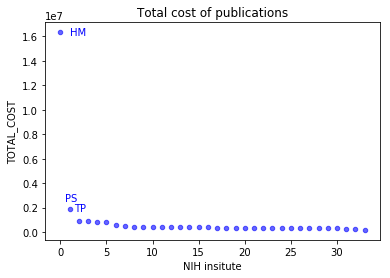

In [17]:
## generate scatter plot
df_by_insitute.plot.scatter(x='index', y='TOTAL_COST',color="blue",alpha=0.6)
plt.title('Total cost of publications')
plt.xlabel('NIH insitute')
plt.ylabel('TOTAL_COST')
plt.annotate('HM', xy=(1,16.1e6),xytext=(1,16.1e6),color="blue")
plt.annotate('PS', xy=(0.5,25e5),xytext=(0.5,25e5),color="blue")
plt.annotate('TP', xy=(1.5,17e5),xytext=(1.5,17e5),color="blue")
plt.savefig("scatter_total_cost.pdf")
plt.show()

b) Groupby total publications by NIH insitute.

In [18]:
total_pub_by_insitute = merge_file_dropna[['ADMINISTERING_IC', 'PMID']].groupby(['ADMINISTERING_IC']).count().sort_values(by='PMID', ascending=False)
total_pub_by_insitute.reset_index(level=0, inplace=True)
total_pub_by_insitute.reset_index(level=0, inplace=True)
total_pub_by_insitute.head()


,index,ADMINISTERING_IC,PMID
0,0,CA,3137
1,1,HL,2033
2,2,DK,1763
3,3,RR,1748
4,4,AI,1699


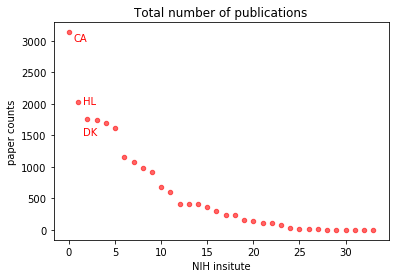

In [19]:
total_pub_by_insitute.plot.scatter(x='index', y='PMID',color="red",alpha=0.6)
plt.title('Total number of publications')
plt.xlabel('NIH insitute')
plt.ylabel('paper counts')
plt.annotate('CA', xy=(0.5,3000),xytext=(0.5,3000),color="red")
plt.annotate('HL', xy=(0.5,3000),xytext=(1.5,2000),color="red")
plt.annotate('DK', xy=(1.5,1500),xytext=(1.5,1500),color="red")
plt.savefig("scatter_total_pub.pdf")
plt.show()

c) Publication speed in different NIH institute.

In [20]:
publish_speed = df_add_time_drop[["ADMINISTERING_IC","time_to_pub"]].groupby(["ADMINISTERING_IC"]).mean().sort_values(by="time_to_pub",ascending=True)
publish_speed.reset_index(level=0, inplace=True)
publish_speed.reset_index(level=0, inplace=True)
publish_speed.head()

,index,ADMINISTERING_IC,time_to_pub
0,0,HG,2.897959
1,1,EB,3.158537
2,2,AI,3.184076
3,3,DC,3.239521
4,4,DK,3.246721


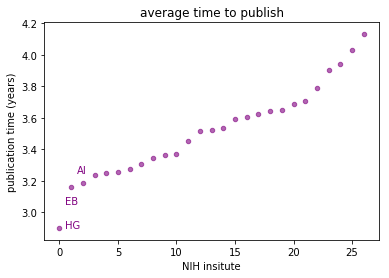

In [21]:
publish_speed.plot.scatter(x='index', y='time_to_pub',color="purple",alpha=0.6)
plt.title('average time to publish')
plt.xlabel('NIH insitute')
plt.ylabel('publication time (years)')
plt.annotate('HG', xy=(1,3),xytext=(0.5,2.9),color="purple")
plt.annotate('EB', xy=(0.5,3.05),xytext=(0.5,3.05),color="purple")
plt.annotate('AI', xy=(1.5,3.25),xytext=(1.5,3.25),color="purple")
plt.savefig("scatter_speed.pdf")
plt.show()

In [22]:
pub = total_pub_by_insitute.copy()
time = publish_speed.copy()
cost = df_by_insitute.copy()

In [23]:
merge1 = pd.merge(pub,time, on="ADMINISTERING_IC")
merge2 = pd.merge(merge1,cost, on="ADMINISTERING_IC")
merge2.head()

,index_x,ADMINISTERING_IC,PMID,index_y,time_to_pub,index,TOTAL_COST
0,0,CA,3137,11,3.450682,22,346204.0
1,1,HL,2033,14,3.532038,14,387500.0
2,2,DK,1763,4,3.246721,16,381250.0
3,3,RR,1748,8,3.346154,7,463840.0
4,4,AI,1699,2,3.184076,13,394259.0


In [24]:
merge2["average"] = merge2["TOTAL_COST"]/merge2["PMID"]
merge3 = merge2.drop("index_x",axis=1)
merge3.to_csv("Insitute_merge.csv")
merge3

,ADMINISTERING_IC,PMID,index_y,time_to_pub,index,TOTAL_COST,average
0,CA,3137,11,3.450682,22,346204.0,110.361492
1,HL,2033,14,3.532038,14,387500.0,190.605017
2,DK,1763,4,3.246721,16,381250.0,216.250709
3,RR,1748,8,3.346154,7,463840.0,265.354691
4,AI,1699,2,3.184076,13,394259.0,232.053561
5,GM,1616,6,3.271478,30,295045.0,182.577351
6,MH,1150,15,3.591426,24,339174.0,294.933913
7,NS,1079,7,3.308429,26,333206.0,308.810009
8,HD,983,17,3.626219,27,332890.0,338.646999
9,AG,912,20,3.688019,20,346821.5,380.286732


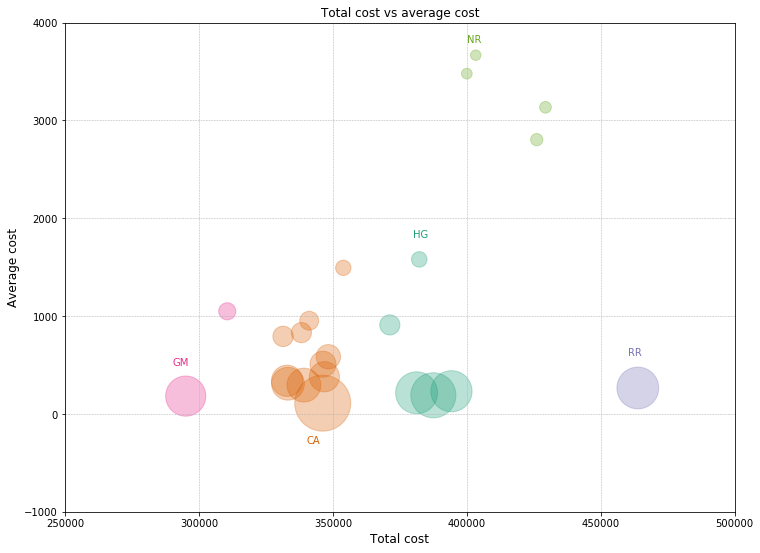

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
# '#d95f02' is orange; #1b9e77 is green; #7570b3 is blue; #e7298a is pink; #66a61e is light green.
test = merge2
color = ['#d95f02', '#1b9e77', '#1b9e77', '#7570b3', '#1b9e77', '#e7298a', '#d95f02', '#d95f02', '#d95f02', '#d95f02', '#d95f02', '#d95f02', '#d95f02', '#1b9e77', '#d95f02', '#d95f02', '#e7298a', '#1b9e77', '#d95f02', '#66a61e', '#66a61e', '#66a61e', '#66a61e', '#66a61e', '#66a61e', '#66a61e', '#66a61e','#66a61e', '#66a61e', '#66a61e','#66a61e', '#66a61e', '#66a61e']
fig, ax1 = plt.subplots(figsize=(12,9))
ax1.scatter(x = test['TOTAL_COST'],
            y = test['average'],
            s = test['PMID'],
            alpha = 0.3,
            c = color)

ax1.set_ylim([-1000,4000])
ax1.set_xlim([250000, 500000])

plt.annotate('RR', xy=(460000,600),xytext=(460000,600),color="#7570b3")
plt.annotate('GM', xy=(460000,600),xytext=(290000,500),color="#e7298a")
plt.annotate('NR', xy=(460000,600),xytext=(400000,3800),color="#66a61e")
plt.annotate('HG', xy=(460000,600),xytext=(380000,1800),color="#1b9e77")
plt.annotate('CA', xy=(460000,600),xytext=(340000,-300),color="#d95f02")

plt.title('Total cost vs average cost', fontsize=12)
plt.xlabel('Total cost', fontsize=12)
plt.ylabel('Average cost', fontsize=12)
plt.grid(True,linestyle='--', linewidth=0.5)
plt.savefig("scatter_merge.png")